In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, desc

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
inspector = inspect(engine)
inspector.get_table_names()

#Get Column Names
columns_m = inspector.get_columns('measurement')

print("Measurement Columns")
for column in columns_m:
    print(column['name'], column['type'])
print('---------------')
print("Station Columns")
columns_s = inspector.get_columns('station')
for column in columns_s:
    print(column['name'], column['type'])

print("\n")
    
#Find first and last date in the data
date_prcp_min = session.query(func.min(Measurement.date)).first()

for row in date_prcp_min:
    print(row)
    
date_prcp_max = session.query(func.max(Measurement.date)).first()

for row in date_prcp_max:
    print(row)

year_ago = dt.datetime.strptime(date_prcp_max[0], "%Y-%m-%d") - dt.timedelta(days=365)

print(year_ago)


Measurement Columns
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
---------------
Station Columns
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


2010-01-01
2017-08-23
2016-08-23 00:00:00


In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_prcp_1 = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= year_ago).all()

#print(date_prcp_1)
                
for row in date_prcp_1:
    print(row)

('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

('2017-06-24', 0.22)
('2017-06-25', 0.5)
('2017-06-26', 0.02)
('2017-06-27', 0.1)
('2017-06-28', 0.02)
('2017-06-29', 0.04)
('2017-06-30', 0.2)
('2017-07-01', 0.1)
('2017-07-02', 0.5)
('2017-07-03', 0.4)
('2017-07-04', 0.0)
('2017-07-05', 0.0)
('2017-07-06', 0.02)
('2017-07-07', 0.3)
('2017-07-08', 0.02)
('2017-07-09', 0.0)
('2017-07-10', 0.02)
('2017-07-11', 0.0)
('2017-07-12', 0.05)
('2017-07-13', 0.68)
('2017-07-14', 0.68)
('2017-07-15', 0.1)
('2017-07-16', 0.5)
('2017-07-17', 0.39)
('2017-07-18', 2.4)
('2017-07-19', 0.27)
('2017-07-20', 0.7)
('2017-07-21', 0.1)
('2017-07-22', 4.0)
('2017-07-23', 0.8)
('2017-07-24', 0.84)
('2017-07-25', 0.3)
('2017-07-26', 0.3)
('2017-07-27', 0.0)
('2017-07-28', 0.4)
('2017-07-29', 0.3)
('2017-07-30', 0.3)
('2017-07-31', 0.0)
('2017-08-01', None)
('2017-08-02', 0.25)
('2017-08-03', 0.06)
('2017-08-05', None)
('2017-08-06', None)
('2017-08-07', 0.05)
('2017-08-08', 0.34)
('2017-08-09', 0.15)
('2017-08-10', 0.07)
('2017-08-11', None)
('2017-08-12', 0.

In [34]:
results = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= year_ago).statement

weather_data_df = pd.read_sql_query(results, session.bind)

# Set date as index

weather_data_df = weather_data_df.set_index("date")

#sort data
weather_data_df = weather_data_df.sort_index(ascending=True)

weather_data_df.head(10)

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
2016-08-24,1.22
2016-08-25,0.08
2016-08-25,0.00


In [35]:
# Print Summary Statistics
weather_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


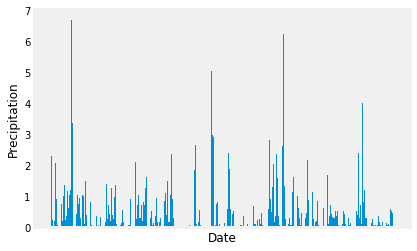

In [36]:
plt.bar(weather_data_df.index, weather_data_df.prcp, align="center")

plt.grid(axis="both")

plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.xticks([])

plt.show()

![precipitation](Images/precipitation.png)

![describe](Images/describe.png)

In [37]:
# Design a query to show how many stations are available in this dataset?
stmt = session.query(func.count(distinct(Measurement.station))).statement

stmt = session.query(func.count(distinct(Measurement.station))).first()

print(f'There are {stmt[0]} stations')


There are 9 stations


In [58]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stmt = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(desc(func.count(Measurement.station))).statement

stations_df = pd.read_sql_query(stmt, session.bind)
stations_df


,station,count_1
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
stmt = session.query(func.min(Measurement.tobs)).first()
for row in stmt:
    print("The lowest recorded temperature is "+ str(row))

stmt = session.query(func.max(Measurement.tobs)).first()
for row in stmt:
    print("The highest recorded temperature is "+ str(row))

stmt = session.query(func.avg(Measurement.tobs)).first()
for row in stmt:
    print("The average recorded temperature is "+ str(row))

stmt = session.query(Measurement.station).\
        group_by(Measurement.station).\
        order_by(desc(func.count(Measurement.station))).first()
for row in stmt:
    station_x = str(row)
    print("The most active station is " + str(row))

The lowest recorded temperature is 53.0
The highest recorded temperature is 87.0
The average recorded temperature is 73.09795396419437
The most active station is USC00519281


In [61]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
print(station_x)

results = session.query(Measurement.date, Measurement.station,Measurement.prcp, Measurement.tobs).\
                filter(Measurement.date >= year_ago).\
                filter(Measurement.station == station_x).statement

station_x_df = pd.read_sql_query(results, session.bind)
station_x_df.head(10)

USC00519281


,date,station,prcp,tobs
0,2016-08-24,USC00519281,2.15,77.0
1,2016-08-25,USC00519281,0.06,80.0
2,2016-08-26,USC00519281,0.01,80.0
3,2016-08-27,USC00519281,0.12,75.0
4,2016-08-28,USC00519281,0.60,73.0
5,2016-08-29,USC00519281,0.35,78.0
6,2016-08-30,USC00519281,0.00,77.0
7,2016-08-31,USC00519281,0.24,78.0
8,2016-09-01,USC00519281,0.02,80.0
9,2016-09-02,USC00519281,0.01,80.0


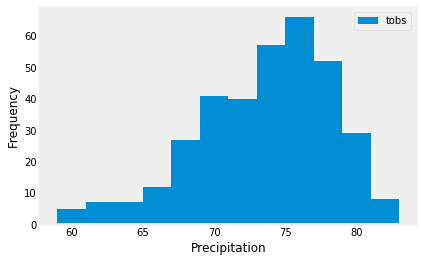

In [68]:
plt.hist(station_x_df['tobs'], bins=12, label="tobs")

plt.grid(axis="both")

plt.xlabel("Precipitation")
plt.ylabel("Frequency")
plt.legend(loc='best')

plt.show()

![precipitation](Images/station-histogram.png)

In [69]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.



In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [20]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [21]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [22]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [23]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [24]:
# Plot the daily normals as an area plot with `stacked=False`
